Importing Necessary Packages


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdca0817518>],
      dtype=object)

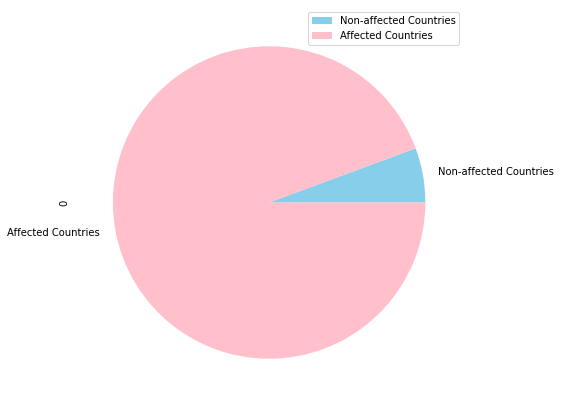

In [ ]:
df = pd.DataFrame([11,184], index=['Non-affected Countries', 'Affected Countries'])
df.plot(kind='pie', subplots=True,colors=['skyblue','pink'], figsize=(7, 8))

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [ ]:
train.sample(6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
2834,2835,NaN,Belize,2020-04-05,5.0,0.0
6114,6115,NaN,Chile,2020-02-10,0.0,0.0
35596,35597,NaN,West Bank and Gaza,2020-03-23,59.0,0.0
34962,34963,NaN,United Kingdom,2020-01-24,0.0,0.0
17650,17651,NaN,Kosovo,2020-03-17,0.0,0.0
12437,12438,NaN,Estonia,2020-02-08,0.0,0.0


In [ ]:
test.sample(6)

,ForecastId,Province_State,Country_Region,Date
11526,11527,New Jersey,US,2020-04-04
2569,2570,Guangdong,China,2020-05-04
1979,1980,Ontario,Canada,2020-04-03
4844,4845,NaN,Finland,2020-04-30
9731,9732,NaN,Sweden,2020-04-15
1235,1236,NaN,Bosnia and Herzegovina,2020-05-03


In [ ]:
df= train.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
countries = df['Country_Region'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

184 countries are in dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

In [ ]:
df1 = train.groupby(['Date', 'Country_Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
today = df1['Date'].max()
print('Date: ', today)
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(df1.query('(Date == @today) & ConfirmedCases > @i'))
    print(f'{n_countries} countries have more than {i} ConfirmedCases')

Date:  2020-05-15
184 countries have more than 1 ConfirmedCases
180 countries have more than 10 ConfirmedCases
150 countries have more than 100 ConfirmedCases
97 countries have more than 1000 ConfirmedCases
46 countries have more than 10000 ConfirmedCases


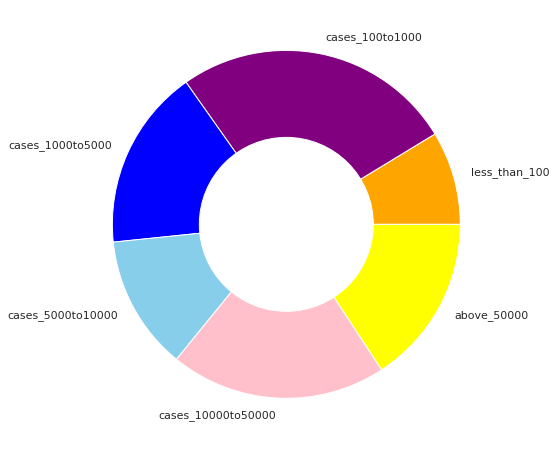

In [ ]:
top_countries = train.groupby('Country_Region')[['ConfirmedCases']].sum().reset_index()
less_than_100 = len(top_countries.query('(ConfirmedCases<=100)'))
cases_100to1000 = len(top_countries.query('(ConfirmedCases>=100) & (ConfirmedCases <=1000)'))
cases_1000to5000=len(top_countries.query('(ConfirmedCases>=1000) & (ConfirmedCases <=5000)'))
cases_5000to10000=len(top_countries.query('(ConfirmedCases>=5000) & (ConfirmedCases <=10000)'))
cases_10000to50000=len(top_countries.query('(ConfirmedCases>=10000) & (ConfirmedCases <=50000)'))
above_50000=len(top_countries.query('(ConfirmedCases>=50000)'))
names='less_than_100', 'cases_100to1000', 'cases_1000to5000', 'cases_5000to10000','cases_10000to50000','above_50000'
size=[16,48,31,23,37,29]
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['orange','purple','blue','skyblue','pink','yellow'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
dfc = train.groupby(['Date', 'Country_Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
all_country_df = dfc.query('Date == @today')
all_country_df['casedensity'] = np.log10(all_country_df['ConfirmedCases'] + 1)
fig = px.choropleth(all_country_df, locations="Country_Region", 
                    locationmode='country names', color="casedensity", 
                    hover_name="Country_Region", hover_data=["ConfirmedCases"],
                    range_color=[all_country_df['casedensity'].min(), all_country_df['casedensity'].max()], 
                    color_continuous_scale="purples", 
                    title=f'Confirmed Case Density {today}')

trace1 = list(fig.select_traces())[0]
trace1.colorbar = go.choropleth.ColorBar(
    tickvals=[0, 1, 2, 3, 4, 5],
    ticktext=['1', '10', '100', '1000','10000'])
fig.show()

In [ ]:
top_country_df = dfc.query('(Date == @today) & (ConfirmedCases > 1000)').sort_values('ConfirmedCases', ascending=False)

top_country_melt_df = pd.melt(top_country_df, id_vars='Country_Region', value_vars='ConfirmedCases')

fig = px.bar(top_country_melt_df, x="Country_Region", y="value", color='variable',
              title=f'Confirmed Cases as on {today}')
fig.show()

In [ ]:
top10_countries = top_countries.sort_values('ConfirmedCases', ascending=False).iloc[:10]['Country_Region'].unique()
top10_countries_df = dfc[dfc['Country_Region'].isin(top10_countries)]
fig = px.line(top10_countries_df,
              x='Date', y='ConfirmedCases', color='Country_Region',
              title=f'Confirmed Cases for top 10 country as on {today}')
fig.show()

ARIMA MODEL(Auto Regressive Integrated Moving Average)




In [ ]:
data=pd.read_csv('train.csv')
data.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [ ]:
data1= data.groupby(['Date','Country_Region'])[['ConfirmedCases','Fatalities']].sum().reset_index()
data2= data1[data1['Country_Region']=='India']
data2.drop(data2[data2['ConfirmedCases']==0].index,inplace=True)
data2['Newcases']=data2['ConfirmedCases']-data2['ConfirmedCases'].shift(1)
data2['New']= data2['Newcases'].rolling(window=3).mean()
data2.drop(data2[data2['Date']<='2020-03-01'].index,inplace=True)
train1=data2.drop(['Country_Region','ConfirmedCases','Fatalities','Newcases'], axis = 1)
train1.head()

,Date,New
7438,2020-03-02,0.666667
7622,2020-03-03,0.666667
7806,2020-03-04,8.333333
7990,2020-03-05,8.333333
8174,2020-03-06,8.666667


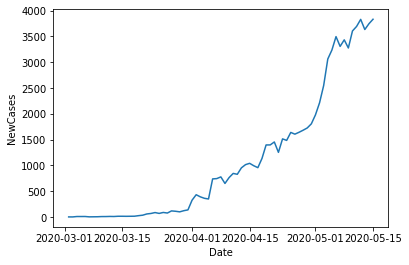

In [ ]:
train1['Date']= pd.to_datetime(train1['Date'])
train2=train1.set_index('Date')
plt.xlabel('Date')
plt.ylabel('NewCases')
plt.plot(train2['New'])

In [ ]:
train2.dropna(inplace=True)
rolmean = train2['New'].rolling(window=5).mean()
rolstd = train2['New'].rolling(window =5).std()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dicky fuller taste')
dftest = adfuller(train2['New'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['Test statistics','P-value','#Lags used','Number of observations'])
for key,values in dftest[4].items():
    dfout['Critical values(%s)'%key]=values
print(dfout)

Dicky fuller taste
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
Critical values(10%)      -2.592314
dtype: float64


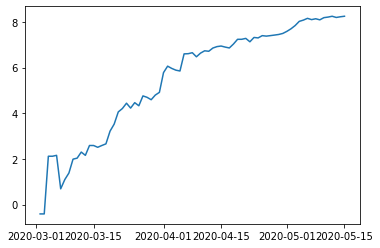

In [ ]:
train2_logscale = np.log(train2['New'])
train2_logscale.dropna(inplace=True)
plt.plot(train2_logscale)

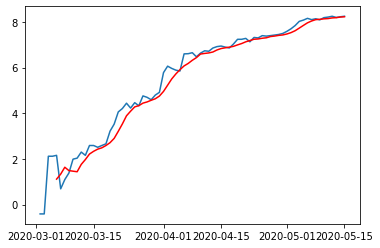

In [ ]:
movingAverage = train2_logscale.rolling(window=5).mean()
movingSTD = train2_logscale.rolling(window =5).std()
plt.plot(train2_logscale)
plt.plot(movingAverage,color='red')

In [ ]:
tm_log_avg = train2_logscale-movingAverage
tm_log_avg.dropna(inplace=True)
def test_stationary(timeseries):
    movingAverage =timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window=5).std()
    orig = plt.plot(timeseries,color='blue',label='Orginal')
    avg = plt.plot(movingAverage,color='black',label='Moving Average')
    std = plt.plot(movingSTD,color='red',label='Rollong std')
    plt.legend(loc='best')
    plt.title('Rolling mean and rolling std')
    plt.show()
    
    print('Dicky fuller taste')
    dftest = adfuller(train2['New'],autolag='AIC')
    dfout = pd.Series(dftest[0:4],index=['Test statistics','P-value','#Lags used','Number of observations'])
    for key,values in dftest[4].items():
        dfout['Critical values(%s)'%key]=values
        print(dfout)

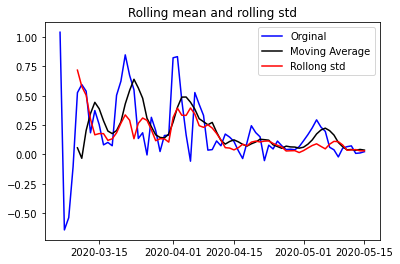

Dicky fuller taste
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
Critical values(10%)      -2.592314
dtype: float64


In [ ]:
test_stationary(tm_log_avg)

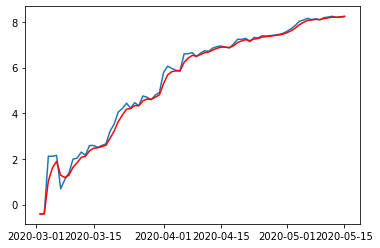

In [ ]:
exponential= train2_logscale.ewm(halflife=1,min_periods=0,adjust=True).mean()
plt.plot(train2_logscale)
plt.plot(exponential, color='red')

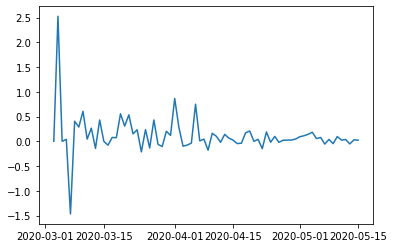

In [ ]:
datashifting = train2_logscale-train2_logscale.shift(1)
plt.plot(datashifting)

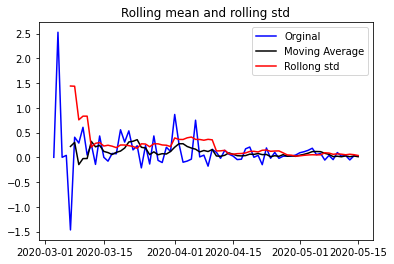

Dicky fuller taste
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
Critical values(10%)      -2.592314
dtype: float64


In [ ]:
datashifting.dropna(inplace=True)
test_stationary(datashifting)

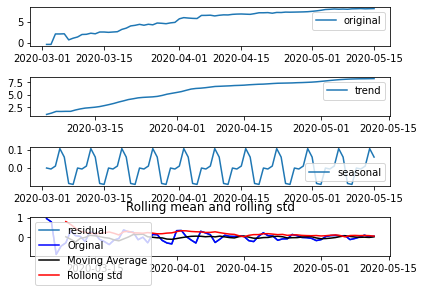

Dicky fuller taste
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
Critical values(10%)      -2.592314
dtype: float64


In [ ]:
train2_logscale.dropna(inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompose = seasonal_decompose(train2_logscale)

trend = decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid

plt.subplot(411)
plt.plot(train2_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

decomposelog= residual
decomposelog.dropna(inplace=True)
test_stationary(decomposelog)

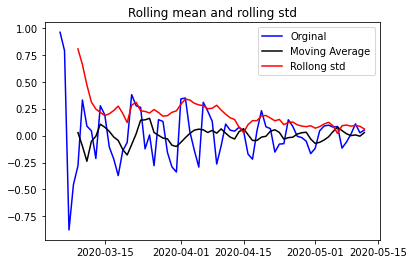

Dicky fuller taste
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
dtype: float64
Test statistics            3.292240
P-value                    1.000000
#Lags used                12.000000
Number of observations    62.000000
Critical values(1%)       -3.540523
Critical values(5%)       -2.909427
Critical values(10%)      -2.592314
dtype: float64


In [ ]:
decomposedlogdata = residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

Plotting AR model


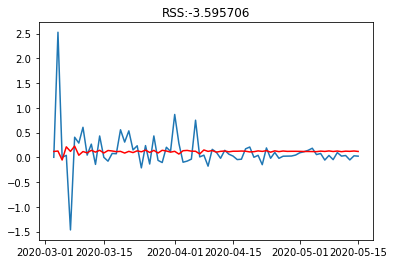

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model =ARIMA(train2_logscale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%4F'%sum(results_AR.fittedvalues - datashifting**2))
print('Plotting AR model')

Plotting MR model


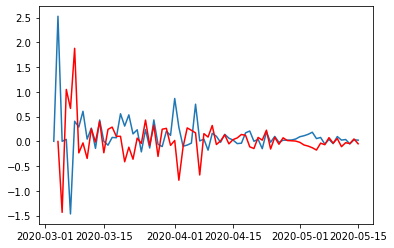

In [ ]:
model =ARIMA(train2_logscale,order=(2,2,1))
results_MA =model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_MA.fittedvalues,color='red')
print('Plotting MR model')

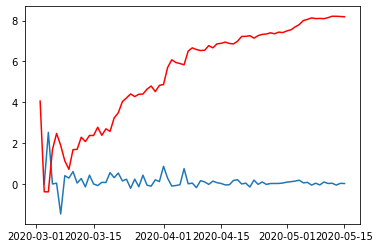

In [ ]:
model = ARIMA(train2_logscale,order=(2,0,1))
results_ARIMA= model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_ARIMA.fittedvalues,color='red')

In [ ]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
2020-03-02    4.058343
2020-03-03   -0.381997
2020-03-04   -0.386897
2020-03-05    1.687871
2020-03-06    2.474168
dtype: float64


In [ ]:
prediction_ARIMA_log=pd.Series(train2_logscale,index= train2_logscale.index)
prediction_ARIMA_log=prediction_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
prediction_ARIMA_log.head()

Date
2020-03-02    3.652878
2020-03-03   -0.787462
2020-03-04    1.733366
2020-03-05    3.808134
2020-03-06    4.633652
dtype: float64

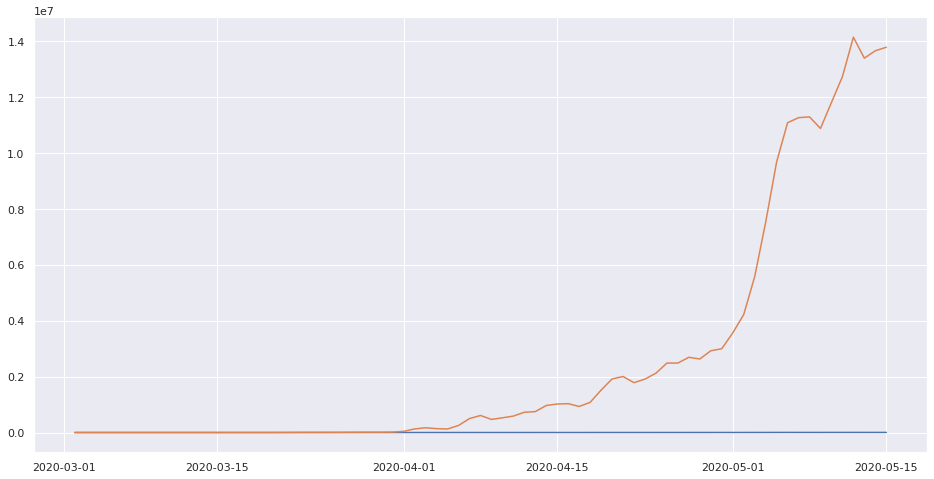

In [ ]:
sns.set(rc={'figure.figsize':(16, 8)})
predictions_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(train2)
plt.plot(predictions_ARIMA)

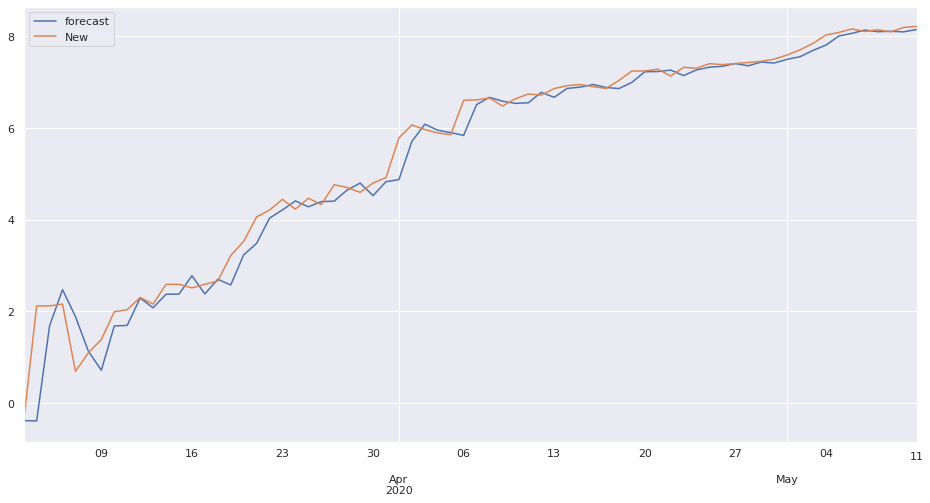

In [ ]:
results_ARIMA.plot_predict(1,70)
x=results_ARIMA.forecast(steps=70)

In [ ]:
values0=x[0][::-1]
values0=np.exp(values0)
values1=x[1]
values1=np.exp(values1)
values= np.concatenate((values1,values0)) 
values

array([1.48751690e+00, 1.69517717e+00, 1.92879372e+00, 2.10241678e+00,
       2.30967872e+00, 2.47464358e+00, 2.67141740e+00, 2.83409895e+00,
       3.02590968e+00, 3.18888229e+00, 3.37834687e+00, 3.54286314e+00,
       3.73142814e+00, 3.89815161e+00, 4.08669320e+00, 4.25598377e+00,
       4.44506374e+00, 4.61710901e+00, 4.80710010e+00, 4.98198318e+00,
       5.17313675e+00, 5.35087424e+00, 5.54335961e+00, 5.72392435e+00,
       5.91785300e+00, 6.10118834e+00, 6.29662961e+00, 6.48265871e+00,
       6.67965037e+00, 6.86828248e+00, 7.06683809e+00, 7.25797294e+00,
       7.45808714e+00, 7.65161801e+00, 7.85327046e+00, 8.04908639e+00,
       8.25224474e+00, 8.45023217e+00, 8.65485433e+00, 8.85489832e+00,
       9.06093430e+00, 9.26291940e+00, 9.47031279e+00, 9.67412373e+00,
       9.88281284e+00, 1.00883351e+01, 1.02982540e+01, 1.05053740e+01,
       1.07164533e+01, 1.09250591e+01, 1.11372266e+01, 1.13472077e+01,
       1.15603893e+01, 1.17716369e+01, 1.19857567e+01, 1.21981642e+01,
      

In [ ]:
ts = pd.read_csv('train.csv')
ts= ts[ts['Country_Region']=='India']
ts.drop(ts[ts['ConfirmedCases']==0].index,inplace=True)
ts['New']=ts['ConfirmedCases']-ts['ConfirmedCases'].shift(1)
ts.drop(ts[ts['Date']<= '2020-03-05'].index,inplace=True)
ts1= ts.groupby('Date')[['New']].sum().reset_index()
ts2 = np.array(ts1['New'])

Text(0, 0.5, 'Range')

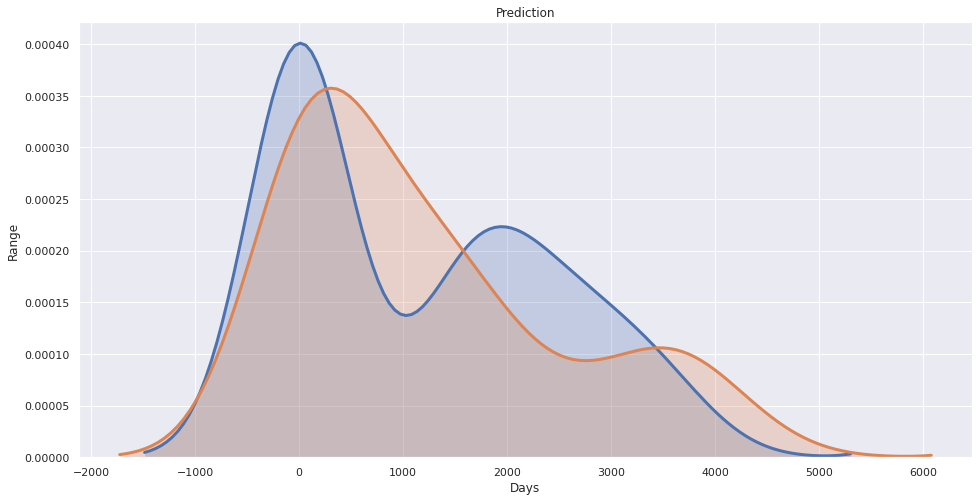

In [ ]:
sns.distplot(values,hist=False,kde= True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(ts2, hist= False,kde=True,kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Prediction')
plt.xlabel('Days')
plt.ylabel('Range')

The KDE plot comprises the original daily new cases vs the predicted daily new cases according to the growth rate. As per the 21st lock down the number of new cases has been decreased a lot. As per the research the COVID has affected 0.17% of the total population in US, 0.15% of the total population of Germany, 0.14% of the total population of France and 0.24% of the total popualtion of Itally. If we consider the total population of India, 27lkhs+ people would have been affected by COVID.
